In [266]:
import pandas as pd
import numpy as np
import platform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

In [321]:
df = pd.read_csv('./상장_재무비율_j_rev01.csv', encoding='utf-8',  index_col=0)
df = df.replace(',','')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8862 entries, (주)CMG제약 to 퓨쳐메디신(주)
Columns: 153 entries, 거래소코드 to EV/EBITDA(배)
dtypes: float64(69), int64(83), object(1)
memory usage: 10.4+ MB


In [371]:
상장_IFRS_성장성 = df.iloc[:,3:20]
상장_IFRS_성장성.isnull().sum()

상장_IFRS_성장성.eq(0).sum(axis=0)
상장_IFRS_성장성.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8862 entries, (주)CMG제약 to 퓨쳐메디신(주)
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   유형자산증가율(IFRS연결)     8862 non-null   float64
 1   비유동생물자산증가율(IFRS연결)  8862 non-null   float64
 2   투자부동산증가율(IFRS연결)    8862 non-null   float64
 3   비유동자산증가율(IFRS연결)    8862 non-null   float64
 4   유동자산증가율(IFRS연결)     8862 non-null   float64
 5   재고자산증가율(IFRS연결)     8862 non-null   float64
 6   자기자본증가율(IFRS연결)     8862 non-null   float64
 7   매출액증가율(IFRS연결)      8862 non-null   float64
 8   정상영업이익증가율(IFRS연결)   8862 non-null   float64
 9   순이익증가율(IFRS연결)      8862 non-null   float64
 10  총포괄이익증가율(IFRS연결)    8862 non-null   float64
 11  매출액총이익률(IFRS연결)     8862 non-null   float64
 12  매출액정상영업이익률(IFRS연결)  8862 non-null   float64
 13  매출액순이익률(IFRS연결)     8862 non-null   float64
 14  총자본사업이익률(IFRS연결)    8862 non-null   float64
 15  총자본정상영업이익률(IFRS연결)  8862 non-null   float64
 16  

In [381]:
import scipy.stats as stats
from scipy.stats import shapiro

for i in 상장_IFRS_성장성.columns:
    statistic, pvalue = stats.shapiro(상장_IFRS_성장성[i])
    print(f'{i}: {statistic:.4f}, {pvalue:.4f}')




유형자산증가율(IFRS연결): 0.0533, 0.0000
비유동생물자산증가율(IFRS연결): 0.0180, 0.0000
투자부동산증가율(IFRS연결): 0.0129, 0.0000
비유동자산증가율(IFRS연결): 0.0868, 0.0000
유동자산증가율(IFRS연결): 0.3553, 0.0000
재고자산증가율(IFRS연결): 0.0097, 0.0000
자기자본증가율(IFRS연결): 0.0981, 0.0000
매출액증가율(IFRS연결): 0.0063, 0.0000
정상영업이익증가율(IFRS연결): 0.0218, 0.0000
순이익증가율(IFRS연결): 0.0380, 0.0000
총포괄이익증가율(IFRS연결): 0.0892, 0.0000
매출액총이익률(IFRS연결): 0.3137, 0.0000
매출액정상영업이익률(IFRS연결): 0.0110, 0.0000
매출액순이익률(IFRS연결): 0.0116, 0.0000
총자본사업이익률(IFRS연결): 0.8044, 0.0000
총자본정상영업이익률(IFRS연결): 0.8014, 0.0000
총자본순이익률(IFRS연결): 0.7469, 0.0000


<Axes: >

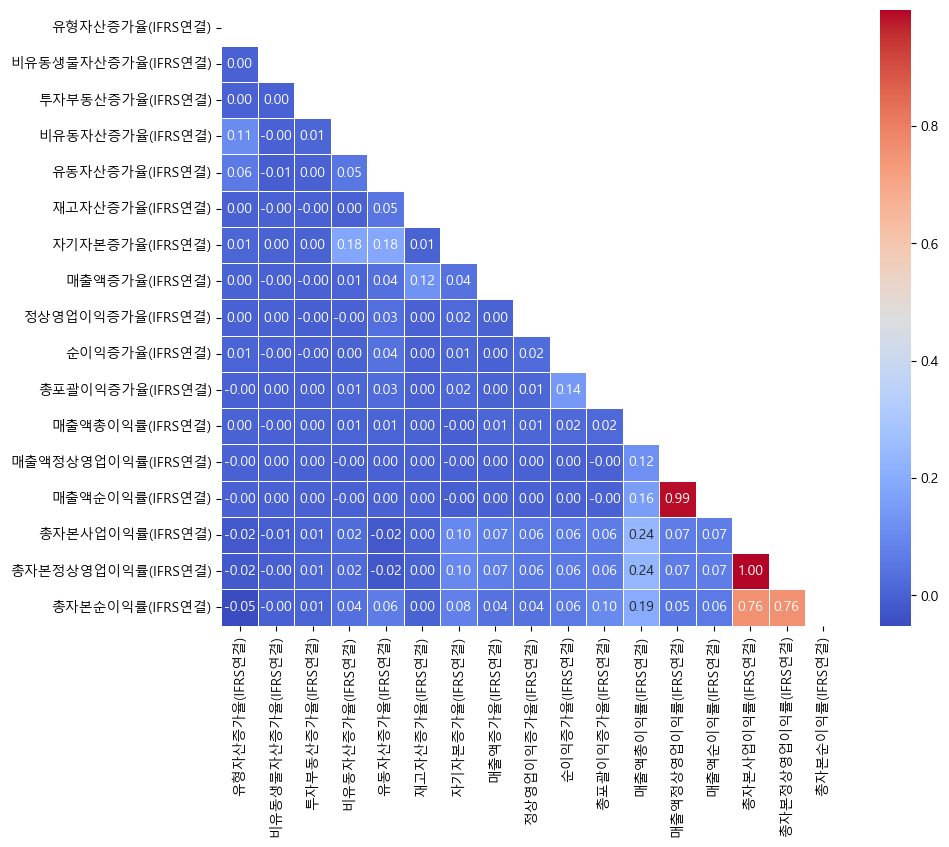

In [323]:
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(상장_IFRS_성장성.corr(), dtype=bool))



sns.heatmap(상장_IFRS_성장성.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f',mask=mask)

In [393]:
상장_IFRS_수익성 = df.iloc[:,38:58]
for i in 상장_IFRS_수익성.columns:
    statistic, pvalue = stats.shapiro(상장_IFRS_수익성[i])
    print(f'{i}: {statistic:.4f}, {pvalue:.4f}')


세금과공과 대 총비용비율(IFRS연결): 0.0452, 0.0000
금융비용 대 총비용비율(IFRS연결): 0.6206, 0.0000
감가상각비 대 총비용비율(IFRS연결): 0.7437, 0.0000
감가상각률(IFRS연결): 0.8160, 0.0000
누적감가상각률(IFRS연결): 0.5478, 0.0000
이자부담률(IFRS연결): 0.5589, 0.0000
지급이자율(IFRS연결): 0.0400, 0.0000
차입금평균이자율(IFRS연결): 0.0141, 0.0000
유보율(IFRS연결): 0.0106, 0.0000
적립금비율(재정비율)(IFRS연결): 0.1513, 0.0000
평균배당률(IFRS연결): nan, 1.0000
자기자본배당률(IFRS연결): nan, 1.0000
배당성향(IFRS연결): nan, 1.0000
1주당매출액(IFRS연결)(원): 0.0691, 0.0000
1주당순이익(IFRS연결)(원): 0.3860, 0.0000
1주당 CASH FLOW(IFRS연결)(원): 0.1014, 0.0000
1주당순자산(IFRS연결)(원): nan, 1.0000
1주당정상영업이익(IFRS연결)(원): 0.0551, 0.0000
유동자산구성비율(IFRS연결): 0.2152, 0.0000
재고자산 대 유동자산비율(IFRS연결): 0.7694, 0.0000


In [390]:
# 상장_IFRS_수익성 = df.iloc[:,21:38]

# 상장_IFRS_수익성.isnull().sum()
# 상장_IFRS_수익성.eq(0).sum(axis=0)

상장_IFRS_수익성 = df.iloc[:,21:58]
상장_IFRS_수익성.isnull().sum()
상장_IFRS_수익성.eq(0).sum(axis=0)

자기자본순이익률(IFRS연결)                  599
경영자본정상영업이익률(IFRS연결)               514
경영자본순이익률(IFRS연결)                  514
자본금정상영업이익률(IFRS연결)                526
자본금순이익률(IFRS연결)                   513
매출원가 대 매출액비율(IFRS연결)              950
영업비용 대 영업수익비율(IFRS연결)             549
기타손익비률(IFRS연결)                    554
금융손익비율(IFRS연결)                    571
금융비용부담률(IFRS연결)                   578
외환이익 대 매출액비율(IFRS연결)             1272
광고선전비 대 매출액비율(IFRS연결)            3053
세금과공과 대 세금과공과 차감전순이익률(IFRS연결)    4368
기업순이익률(IFRS연결)                    517
수지비율(관계기업투자손익 제외)(IFRS연결)         513
인건비 대 총비용비율(IFRS연결)               587
R & D 투자효율(IFRS연결)               6385
세금과공과 대 총비용비율(IFRS연결)            7029
금융비용 대 총비용비율(IFRS연결)              560
감가상각비 대 총비용비율(IFRS연결)             522
감가상각률(IFRS연결)                     518
누적감가상각률(IFRS연결)                  1198
이자부담률(IFRS연결)                     534
지급이자율(IFRS연결)                    1284
차입금평균이자율(IFRS연결)                 1117
유보율(IFRS연결)                       545
적립금비율(재정비율)(

In [ ]:
# 상장_IFRS_수익성 = df.iloc[:,21:38]

# 상장_IFRS_수익성.isnull().sum()
# 상장_IFRS_수익성.eq(0).sum(axis=0)

상장_IFRS_수익성 = df.iloc[:,38:58]
상장_IFRS_수익성.isnull().sum()
상장_IFRS_수익성.eq(0).sum(axis=0)

세금과공과 대 총비용비율(IFRS연결)       7029
금융비용 대 총비용비율(IFRS연결)         560
감가상각비 대 총비용비율(IFRS연결)        522
감가상각률(IFRS연결)                518
누적감가상각률(IFRS연결)             1198
이자부담률(IFRS연결)                534
지급이자율(IFRS연결)               1284
차입금평균이자율(IFRS연결)            1117
유보율(IFRS연결)                  545
적립금비율(재정비율)(IFRS연결)          583
평균배당률(IFRS연결)               2040
자기자본배당률(IFRS연결)             2093
배당성향(IFRS연결)                2111
1주당매출액(IFRS연결)(원)            552
1주당순이익(IFRS연결)(원)            713
1주당 CASH FLOW(IFRS연결)(원)     535
1주당순자산(IFRS연결)(원)            559
1주당정상영업이익(IFRS연결)(원)         526
유동자산구성비율(IFRS연결)             514
재고자산 대 유동자산비율(IFRS연결)       1504
dtype: int64

In [325]:
object_columns = 상장_IFRS_수익성.select_dtypes(include='object').columns
print(object_columns)


Index([], dtype='object')


<Axes: >

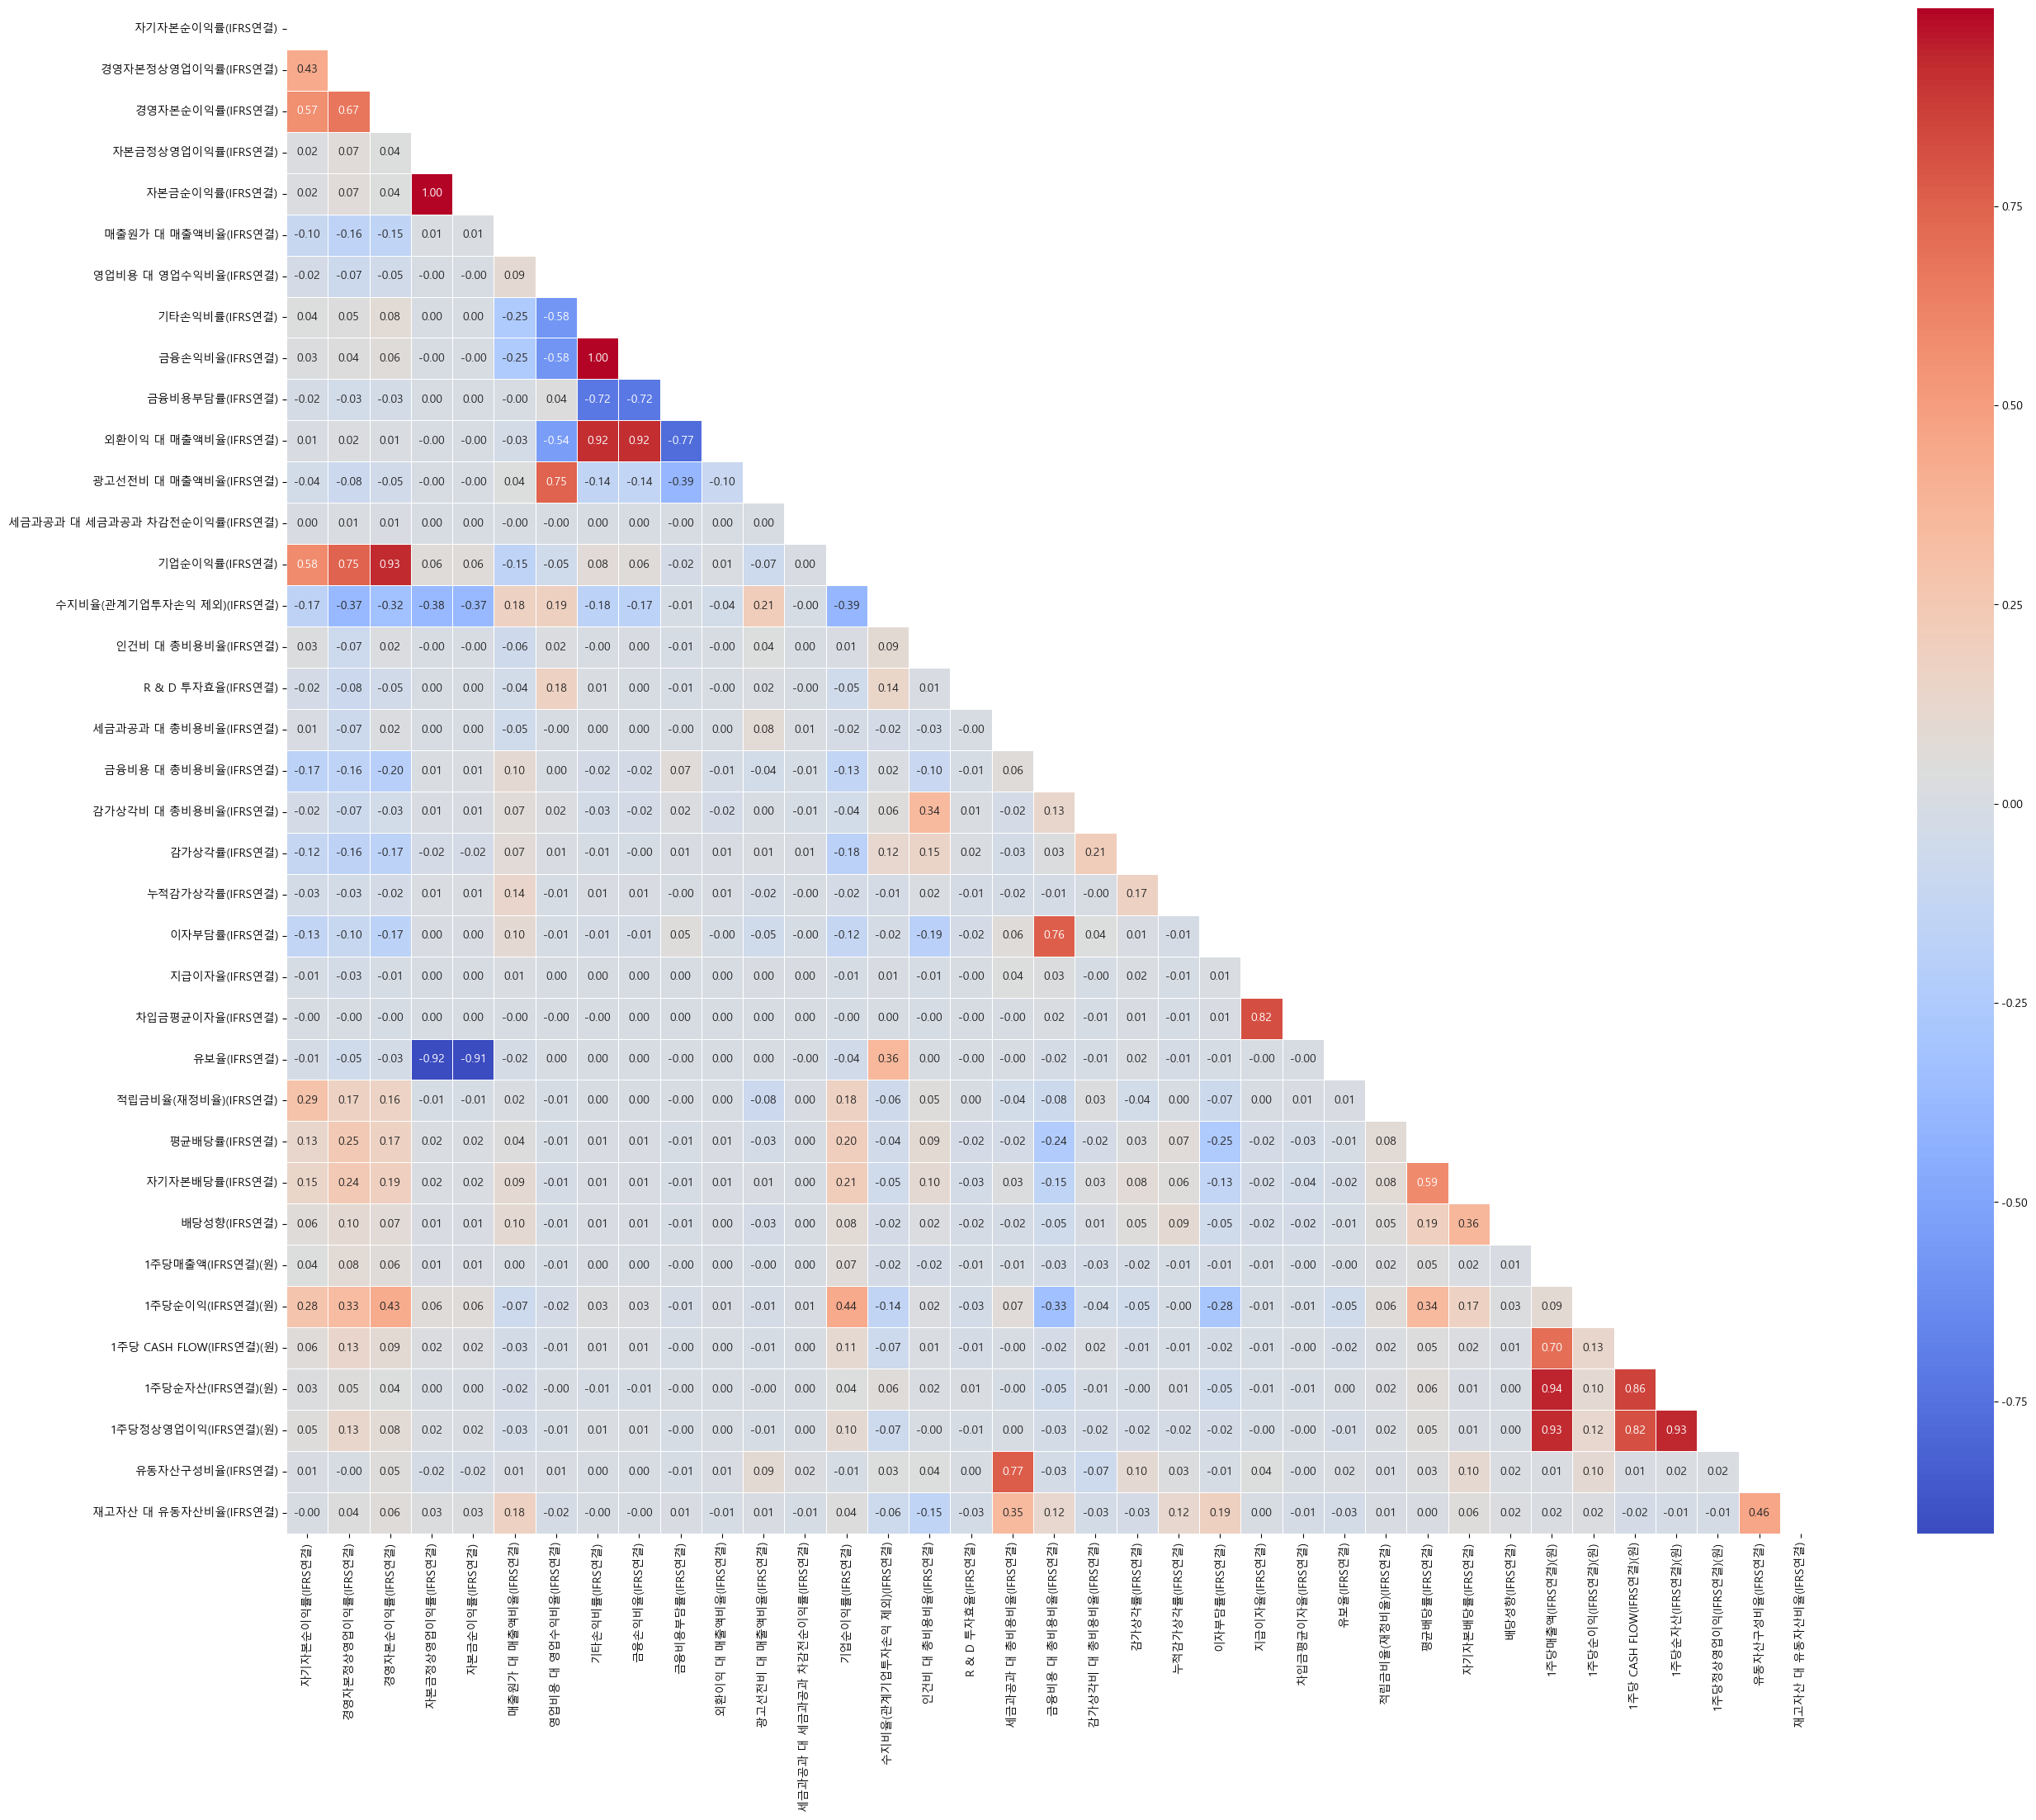

In [326]:
plt.figure(figsize=(30, 24))
mask = np.triu(np.ones_like(상장_IFRS_수익성.corr(), dtype=bool))



sns.heatmap(상장_IFRS_수익성.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f',mask=mask)

In [337]:
상장_IFRS_안정성 = df.iloc[:,58:94]
상장_IFRS_안정성.isnull().sum()
상장_IFRS_안정성.eq(0).sum(axis=0)
# 상장_IFRS_안정성.info()


유동자산 대 비유동자산비율(IFRS연결)        524
당좌자산구성비율(IFRS연결)              514
비유동자산구성비율(IFRS연결)             514
자기자본구성비율(IFRS연결)              568
타인자본구성비율(IFRS연결)              513
자기자본배율(IFRS연결)                545
비유동비율(IFRS연결)                 577
비유동장기적합률(IFRS연결)              576
유동비율(IFRS연결)                  513
당좌비율(IFRS연결)                  513
현금비율(IFRS연결)                  593
매출채권비율(IFRS연결)               1197
재고자산 대 순운전자본비율(IFRS연결)       2783
매출채권 대 매입채무비율(IFRS연결)        1068
매출채권 대 상,제품비율(IFRS연결)        1773
매입채무 대 재고자산비율(IFRS연결)        1405
부채비율(IFRS연결)                  576
유동부채비율(IFRS연결)                592
단기차입금 대 총차입금비율(IFRS연결)       2589
비유동부채비율(IFRS연결)              1122
비유동부채 대 순운전자본비율(IFRS연결)      2385
순운전자본비율(IFRS연결)               597
차입금의존도(IFRS연결)               1593
차입금비율(IFRS연결)                1607
이자보상배율(이자비용)(IFRS연결)          988
이자보상배율(순금융비용)(IFRS연결)         783
유보액대비율(IFRS연결)                590
유보액 대 납입자본배율(IFRS연결)         1352
유동자산집중도(IFRS연결)               536
비유동자산집중도(IFRS연

In [394]:

for i in 상장_IFRS_안정성.columns:
    statistic, pvalue = stats.shapiro(상장_IFRS_안정성[i])
    print(f'{i}: {statistic:.4f}, {pvalue:.4f}')


총자본회전률(IFRS연결): 0.6190, 0.0000
경영자본회전률(IFRS연결): 0.5975, 0.0000
자기자본회전률(IFRS연결): 0.3861, 0.0000
자본금회전률(IFRS연결): 0.0646, 0.0000
타인자본회전률(IFRS연결): 0.8153, 0.0000
매입채무회전률(IFRS연결): 0.0054, 0.0000
매입채무회전기간(IFRS연결): 0.0089, 0.0000
유동자산회전률(IFRS연결): 0.7571, 0.0000
당좌자산회전률(IFRS연결): 0.7719, 0.0000
재고자산회전률(IFRS연결): 0.0277, 0.0000
재고자산회전기간(IFRS연결): 0.0047, 0.0000
상품,제품회전률(IFRS연결): 0.0083, 0.0000
원,부재료회전률(IFRS연결): 0.0062, 0.0000
재공품회전률(IFRS연결): 0.0052, 0.0000
매출채권회전률(IFRS연결): 0.0568, 0.0000
매출채권회전기간(IFRS연결): 0.1416, 0.0000
비유동자산회전률(IFRS연결): 0.0971, 0.0000
유형자산회전율(IFRS연결): 0.0999, 0.0000
순운전자본회전률(IFRS연결): 0.5067, 0.0000
운전자본회전률(IFRS연결): 0.0196, 0.0000
1회전기간(IFRS연결): 0.0098, 0.0000


<Axes: >

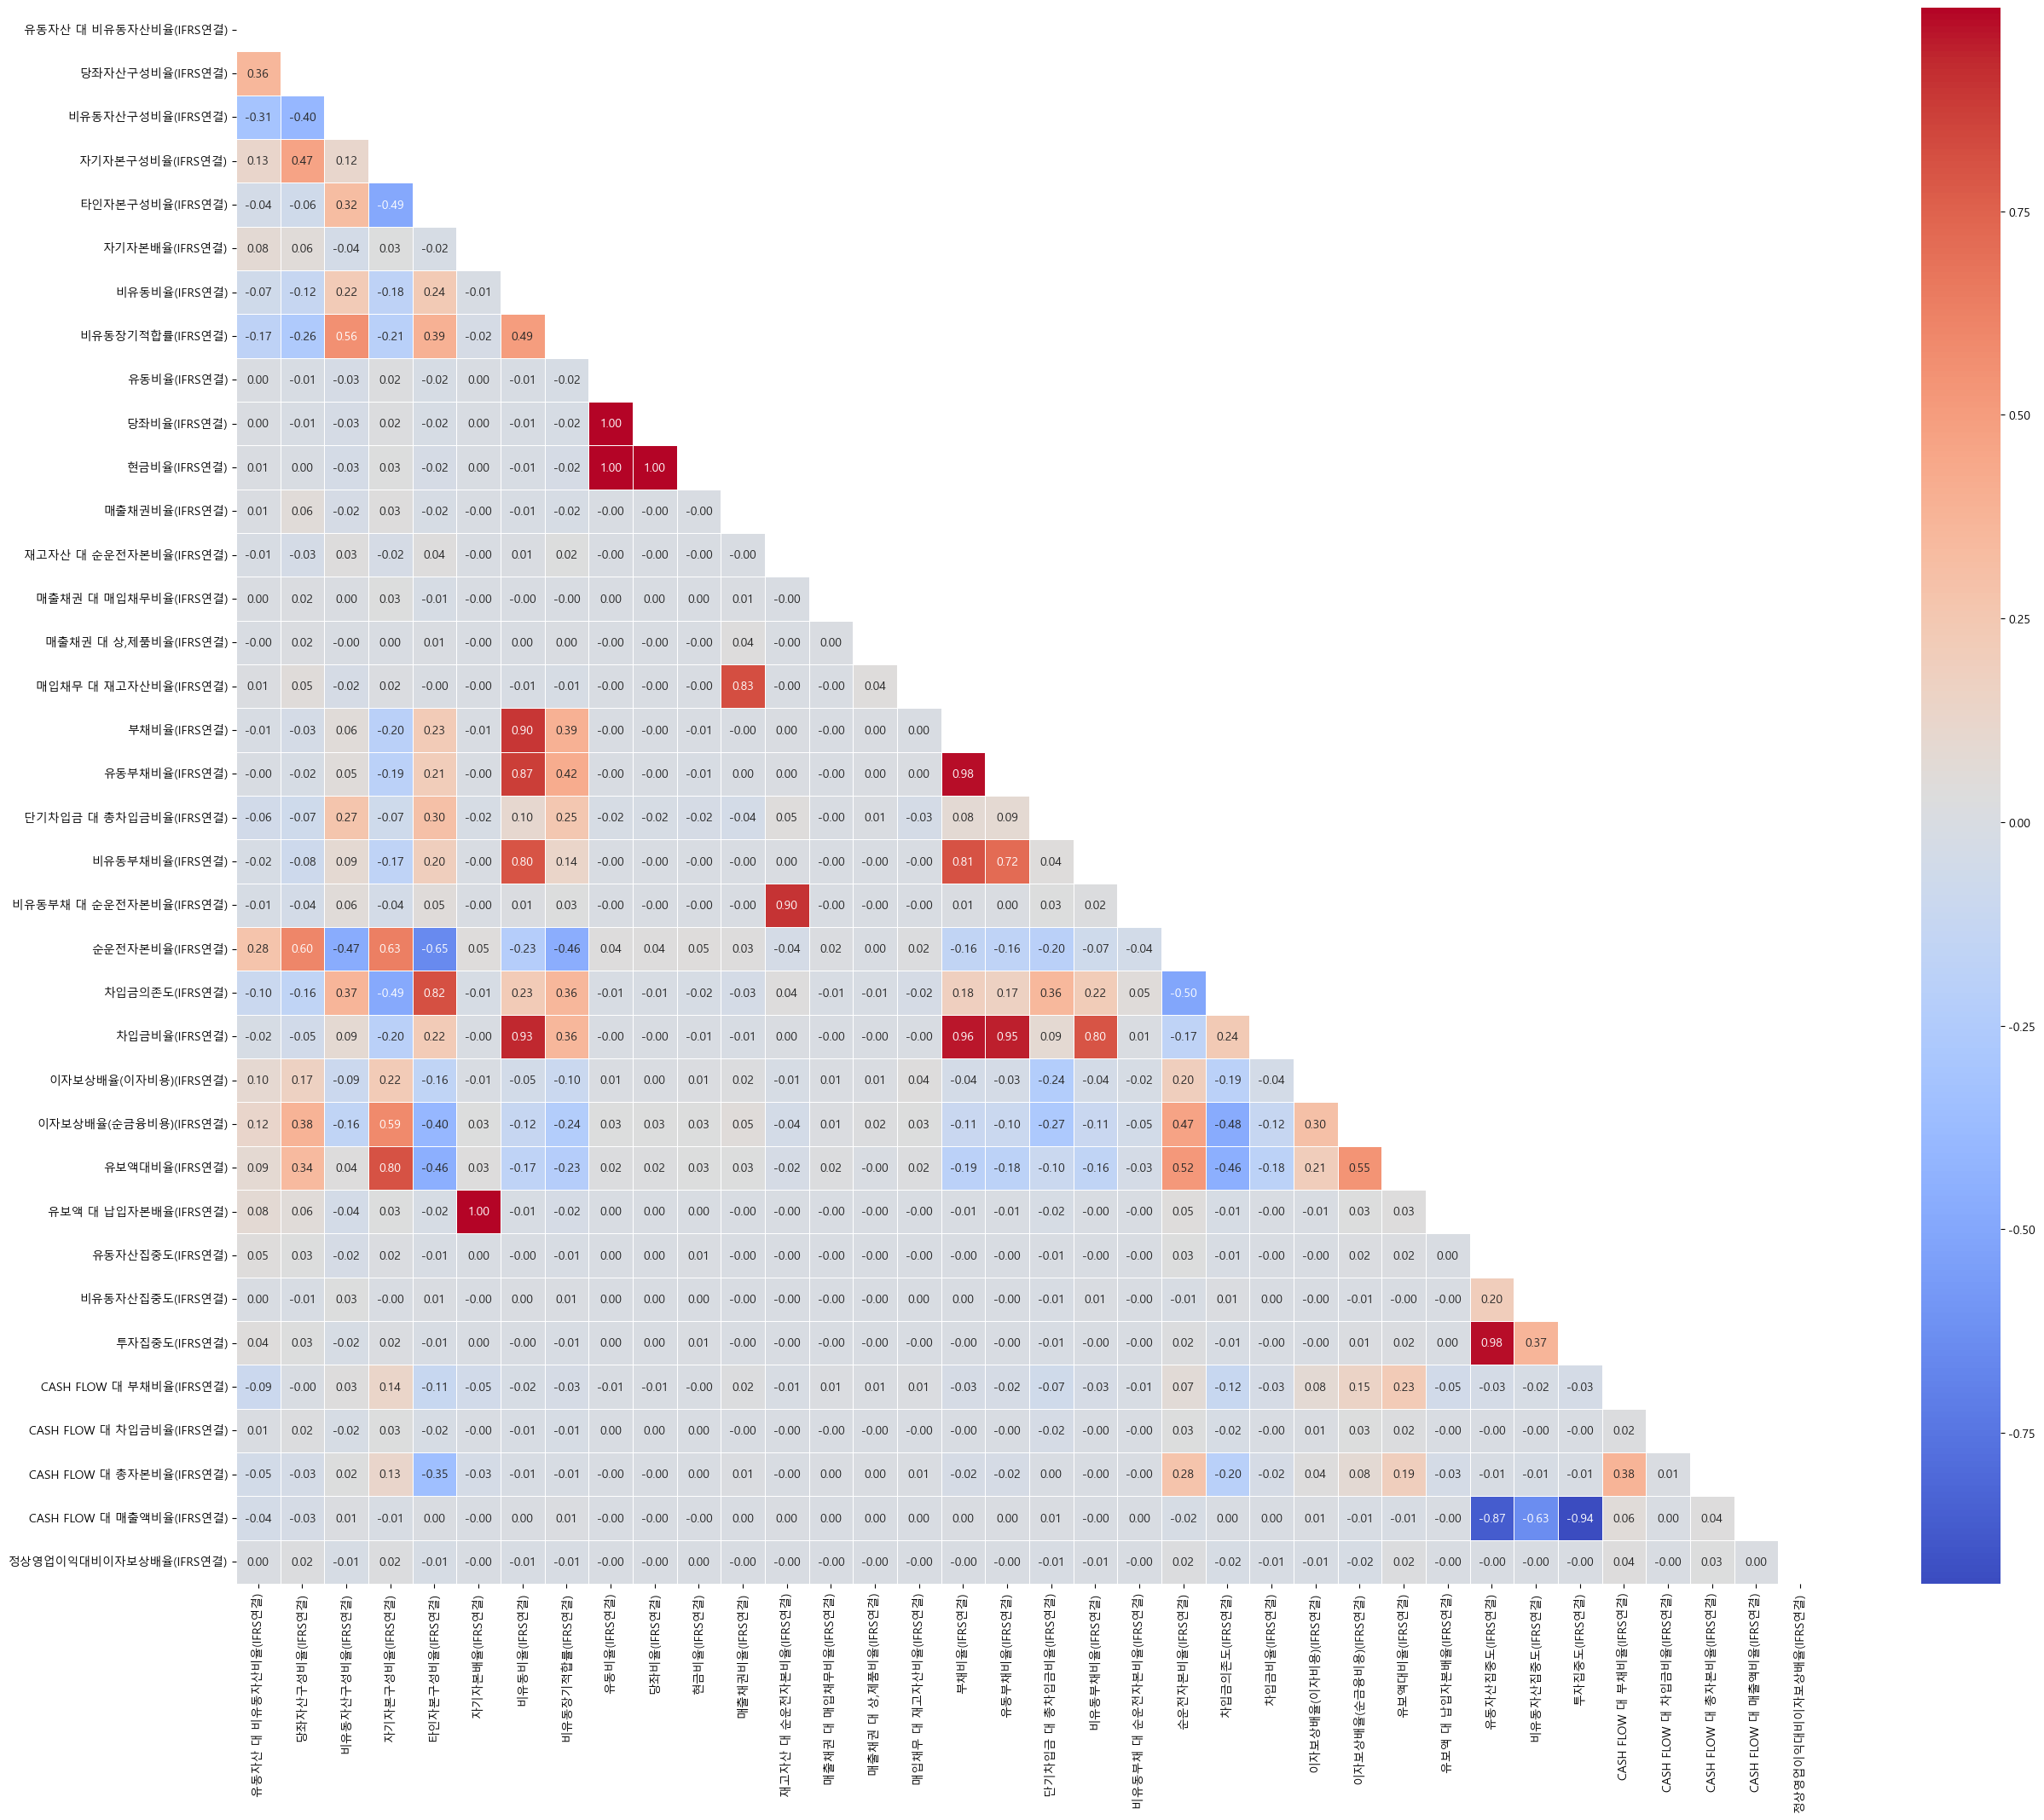

In [338]:
plt.figure(figsize=(30, 24))
mask = np.triu(np.ones_like(상장_IFRS_안정성.corr(), dtype=bool))



sns.heatmap(상장_IFRS_안정성.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f',mask=mask)

In [345]:
상장_IFRS_활동성 = df.iloc[:,94:115]
상장_IFRS_활동성.isnull().sum()
#상장_IFRS_활동성.eq(0).sum(axis=0)
# 상장_IFRS_안정성.info()


총자본회전률(IFRS연결)      3549
경영자본회전률(IFRS연결)     2634
자기자본회전률(IFRS연결)     2242
자본금회전률(IFRS연결)       885
타인자본회전률(IFRS연결)     1255
매입채무회전률(IFRS연결)      972
매입채무회전기간(IFRS연결)    1066
유동자산회전률(IFRS연결)     1564
당좌자산회전률(IFRS연결)     1416
재고자산회전률(IFRS연결)     1109
재고자산회전기간(IFRS연결)    1215
상품,제품회전률(IFRS연결)    1633
원,부재료회전률(IFRS연결)    2002
재공품회전률(IFRS연결)      3783
매출채권회전률(IFRS연결)      601
매출채권회전기간(IFRS연결)     586
비유동자산회전률(IFRS연결)    1560
유형자산회전율(IFRS연결)      889
순운전자본회전률(IFRS연결)    2447
운전자본회전률(IFRS연결)     8291
1회전기간(IFRS연결)       8824
dtype: int64

In [395]:
for i in 상장_IFRS_활동성.columns:
    statistic, pvalue = stats.shapiro(상장_IFRS_활동성[i])
    print(f'{i}: {statistic:.4f}, {pvalue:.4f}')

부가가치(IFRS연결)(백만원): 0.4161, 0.0000
종업원1인당 인건비(IFRS연결)(백만원): nan, 1.0000
노동장비율(IFRS연결): nan, 1.0000
기계장비율(IFRS연결): nan, 1.0000
자본집약도(IFRS연결): nan, 1.0000
총자본투자효율(IFRS연결): 0.7266, 0.0000
설비투자효율(IFRS연결): 0.0843, 0.0000
기계투자효율(IFRS연결): 0.0422, 0.0000
부가가치율(IFRS연결): 0.0129, 0.0000
노동소득분배율(IFRS연결): 0.0265, 0.0000
자본분배율(IFRS연결): 0.0243, 0.0000
이윤분배율(IFRS연결): 0.0204, 0.0000
부가가치(IFRS연결)(백만원).1: 0.4161, 0.0000
법인세비용차감전(계속사업)손익(IFRS연결)(백만원): 0.3202, 0.0000
인건비(IFRS연결)(백만원): 0.5698, 0.0000
금융비용(IFRS연결)(백만원): 0.5154, 0.0000
임차료(IFRS연결)(백만원): 0.3002, 0.0000
세금과공과(IFRS연결)(백만원): 0.1301, 0.0000
감가상각비(IFRS연결)(백만원): 0.5845, 0.0000
종업원1인당 부가가치(IFRS연결)(백만원): nan, 1.0000
총자본투자효율(IFRS연결).1: 0.3219, 0.0000
기계투자효율(IFRS연결).1: 0.0422, 0.0000
부가가치율(IFRS연결).1: 0.0129, 0.0000
종업원수(IFRS연결): nan, 1.0000


<Axes: >

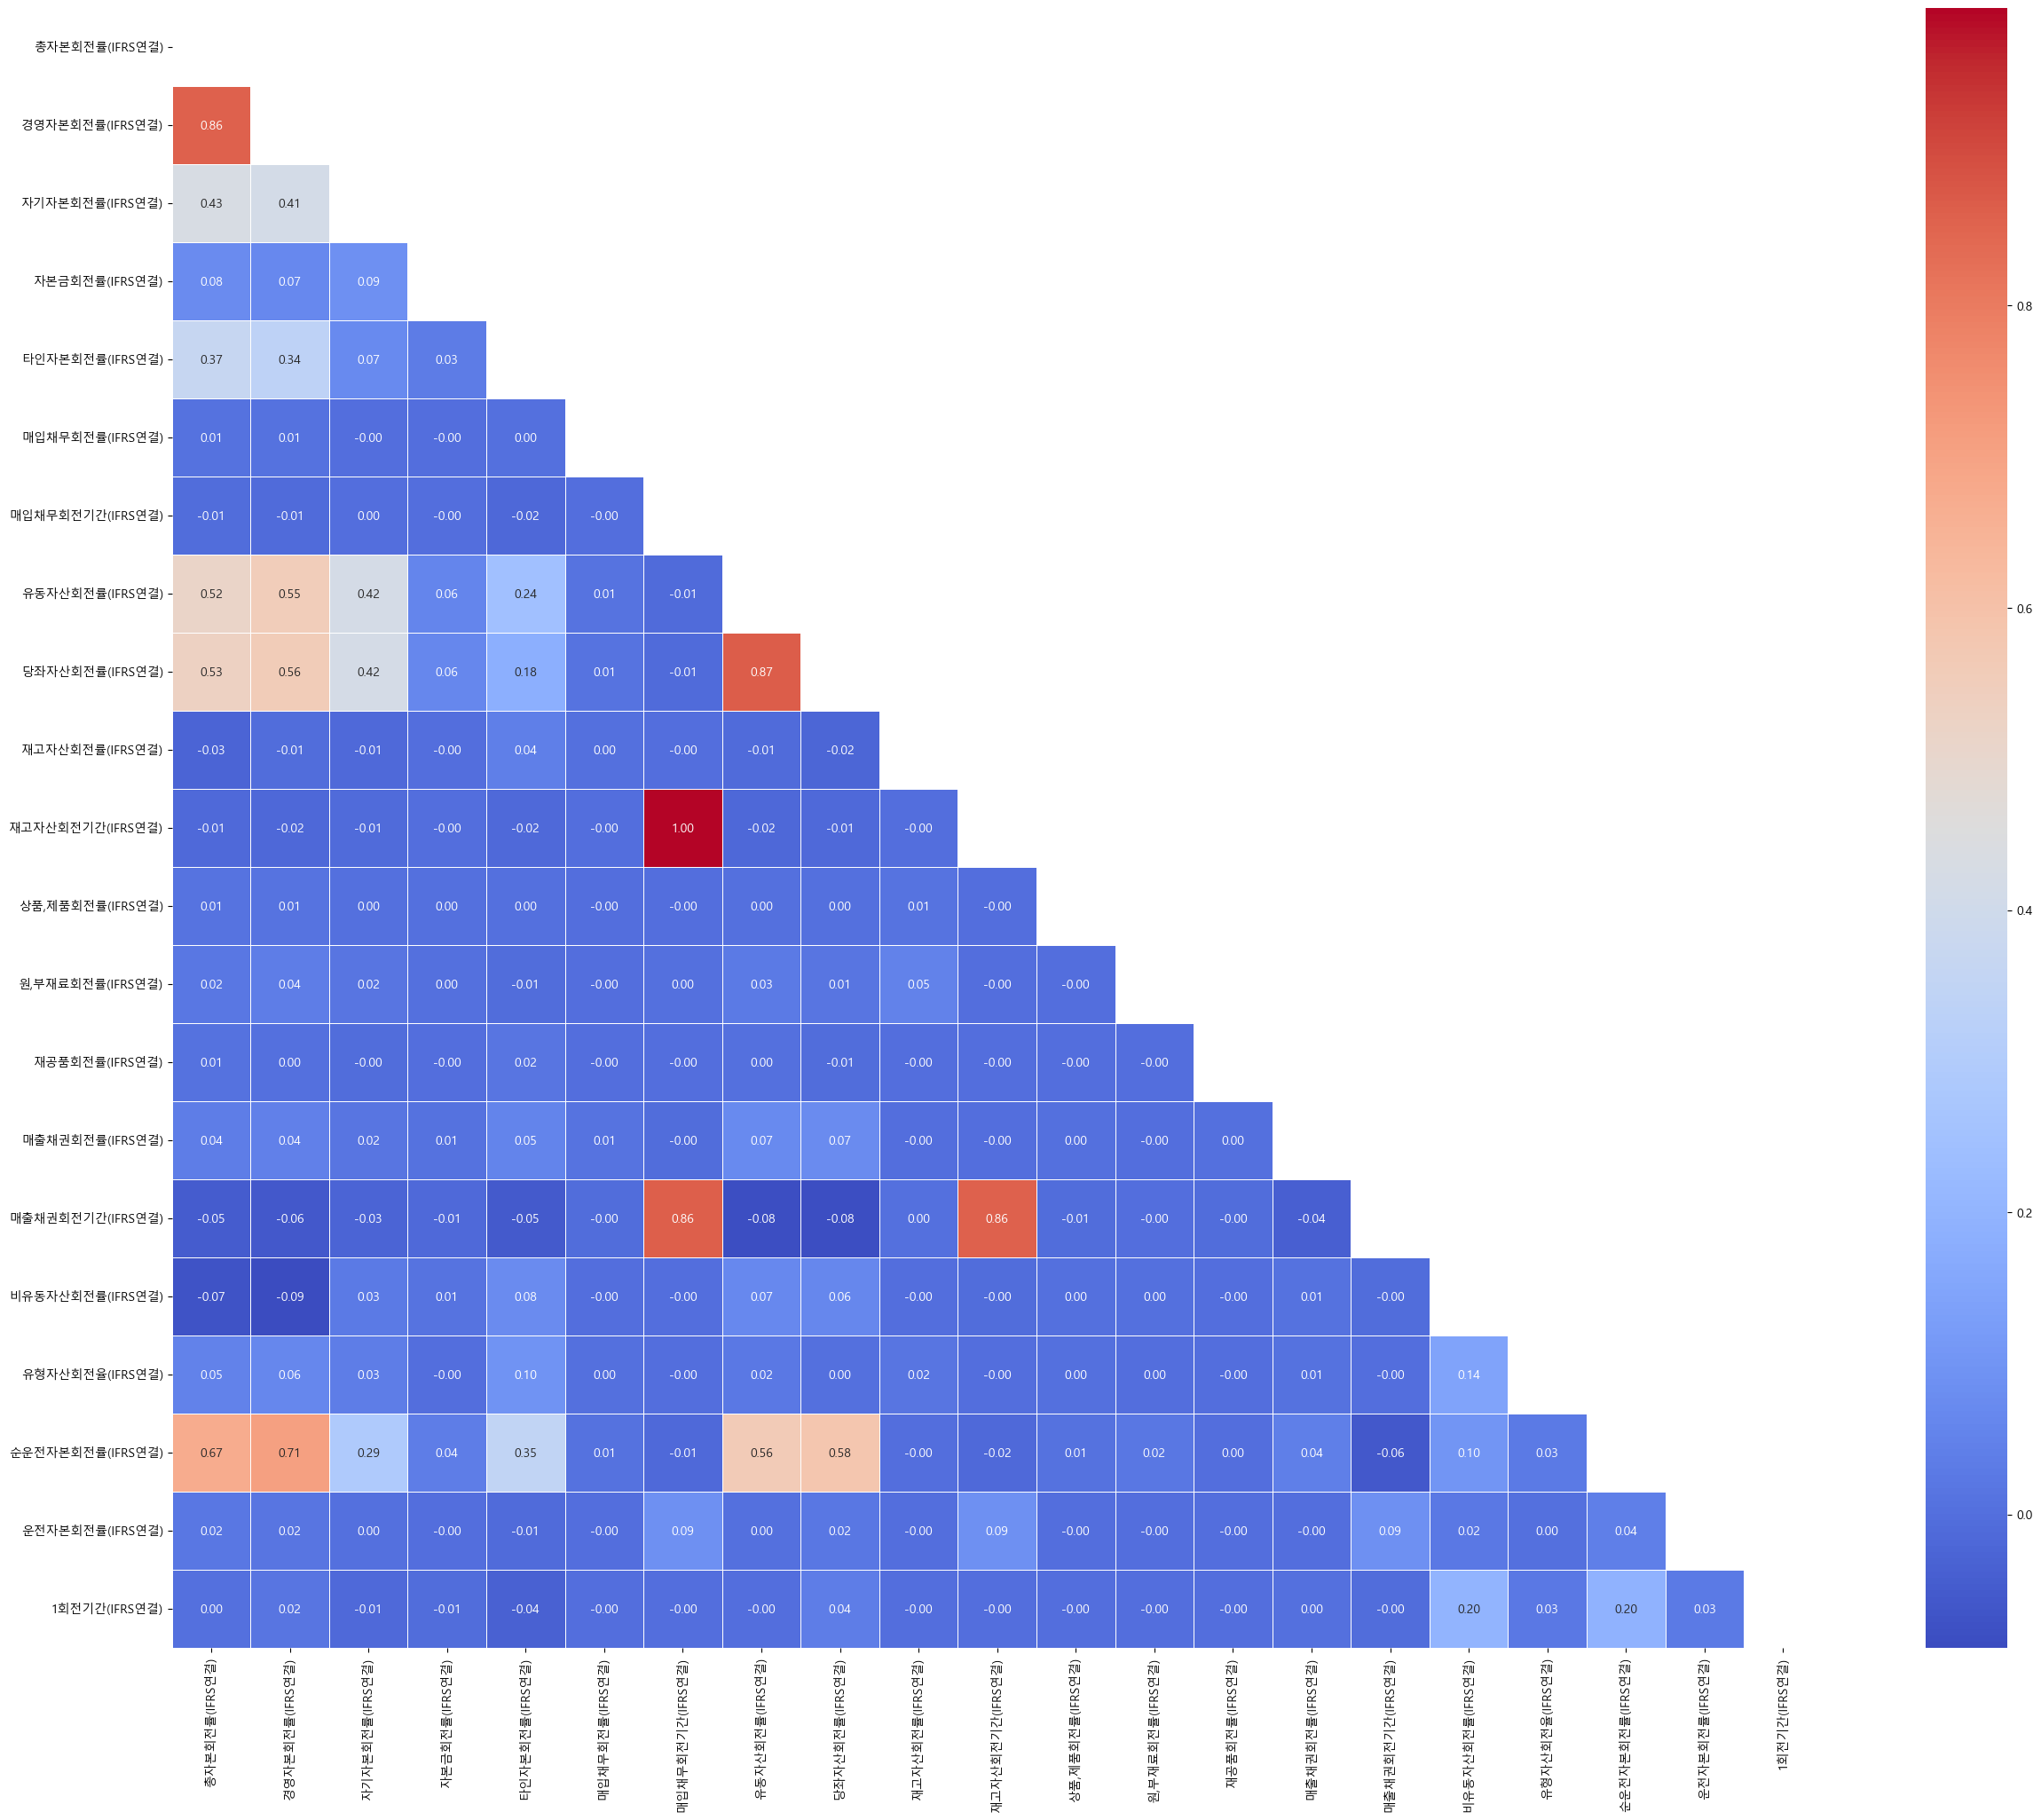

In [346]:
plt.figure(figsize=(30, 24))
mask = np.triu(np.ones_like(상장_IFRS_활동성.corr(), dtype=bool))



sns.heatmap(상장_IFRS_활동성.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f',mask=mask)

In [352]:
상장_IFRS_생산성 = df.iloc[:,115:127]
상장_IFRS_생산성.isnull().sum()
상장_IFRS_생산성.eq(0).sum(axis=0)

부가가치(IFRS연결)(백만원)           515
종업원1인당 인건비(IFRS연결)(백만원)     541
노동장비율(IFRS연결)              1890
기계장비율(IFRS연결)              2058
자본집약도(IFRS연결)              1901
총자본투자효율(IFRS연결)             618
설비투자효율(IFRS연결)              538
기계투자효율(IFRS연결)             1067
부가가치율(IFRS연결)               588
노동소득분배율(IFRS연결)            1908
자본분배율(IFRS연결)              1922
이윤분배율(IFRS연결)              1910
dtype: int64

In [396]:
for i in 상장_IFRS_생산성.columns:
    statistic, pvalue = stats.shapiro(상장_IFRS_생산성[i])
    print(f'{i}: {statistic:.4f}, {pvalue:.4f}')

부가가치(IFRS연결)(백만원): 0.4161, 0.0000
종업원1인당 인건비(IFRS연결)(백만원): nan, 1.0000
노동장비율(IFRS연결): nan, 1.0000
기계장비율(IFRS연결): nan, 1.0000
자본집약도(IFRS연결): nan, 1.0000
총자본투자효율(IFRS연결): 0.7266, 0.0000
설비투자효율(IFRS연결): 0.0843, 0.0000
기계투자효율(IFRS연결): 0.0422, 0.0000
부가가치율(IFRS연결): 0.0129, 0.0000
노동소득분배율(IFRS연결): 0.0265, 0.0000
자본분배율(IFRS연결): 0.0243, 0.0000
이윤분배율(IFRS연결): 0.0204, 0.0000


<Axes: >

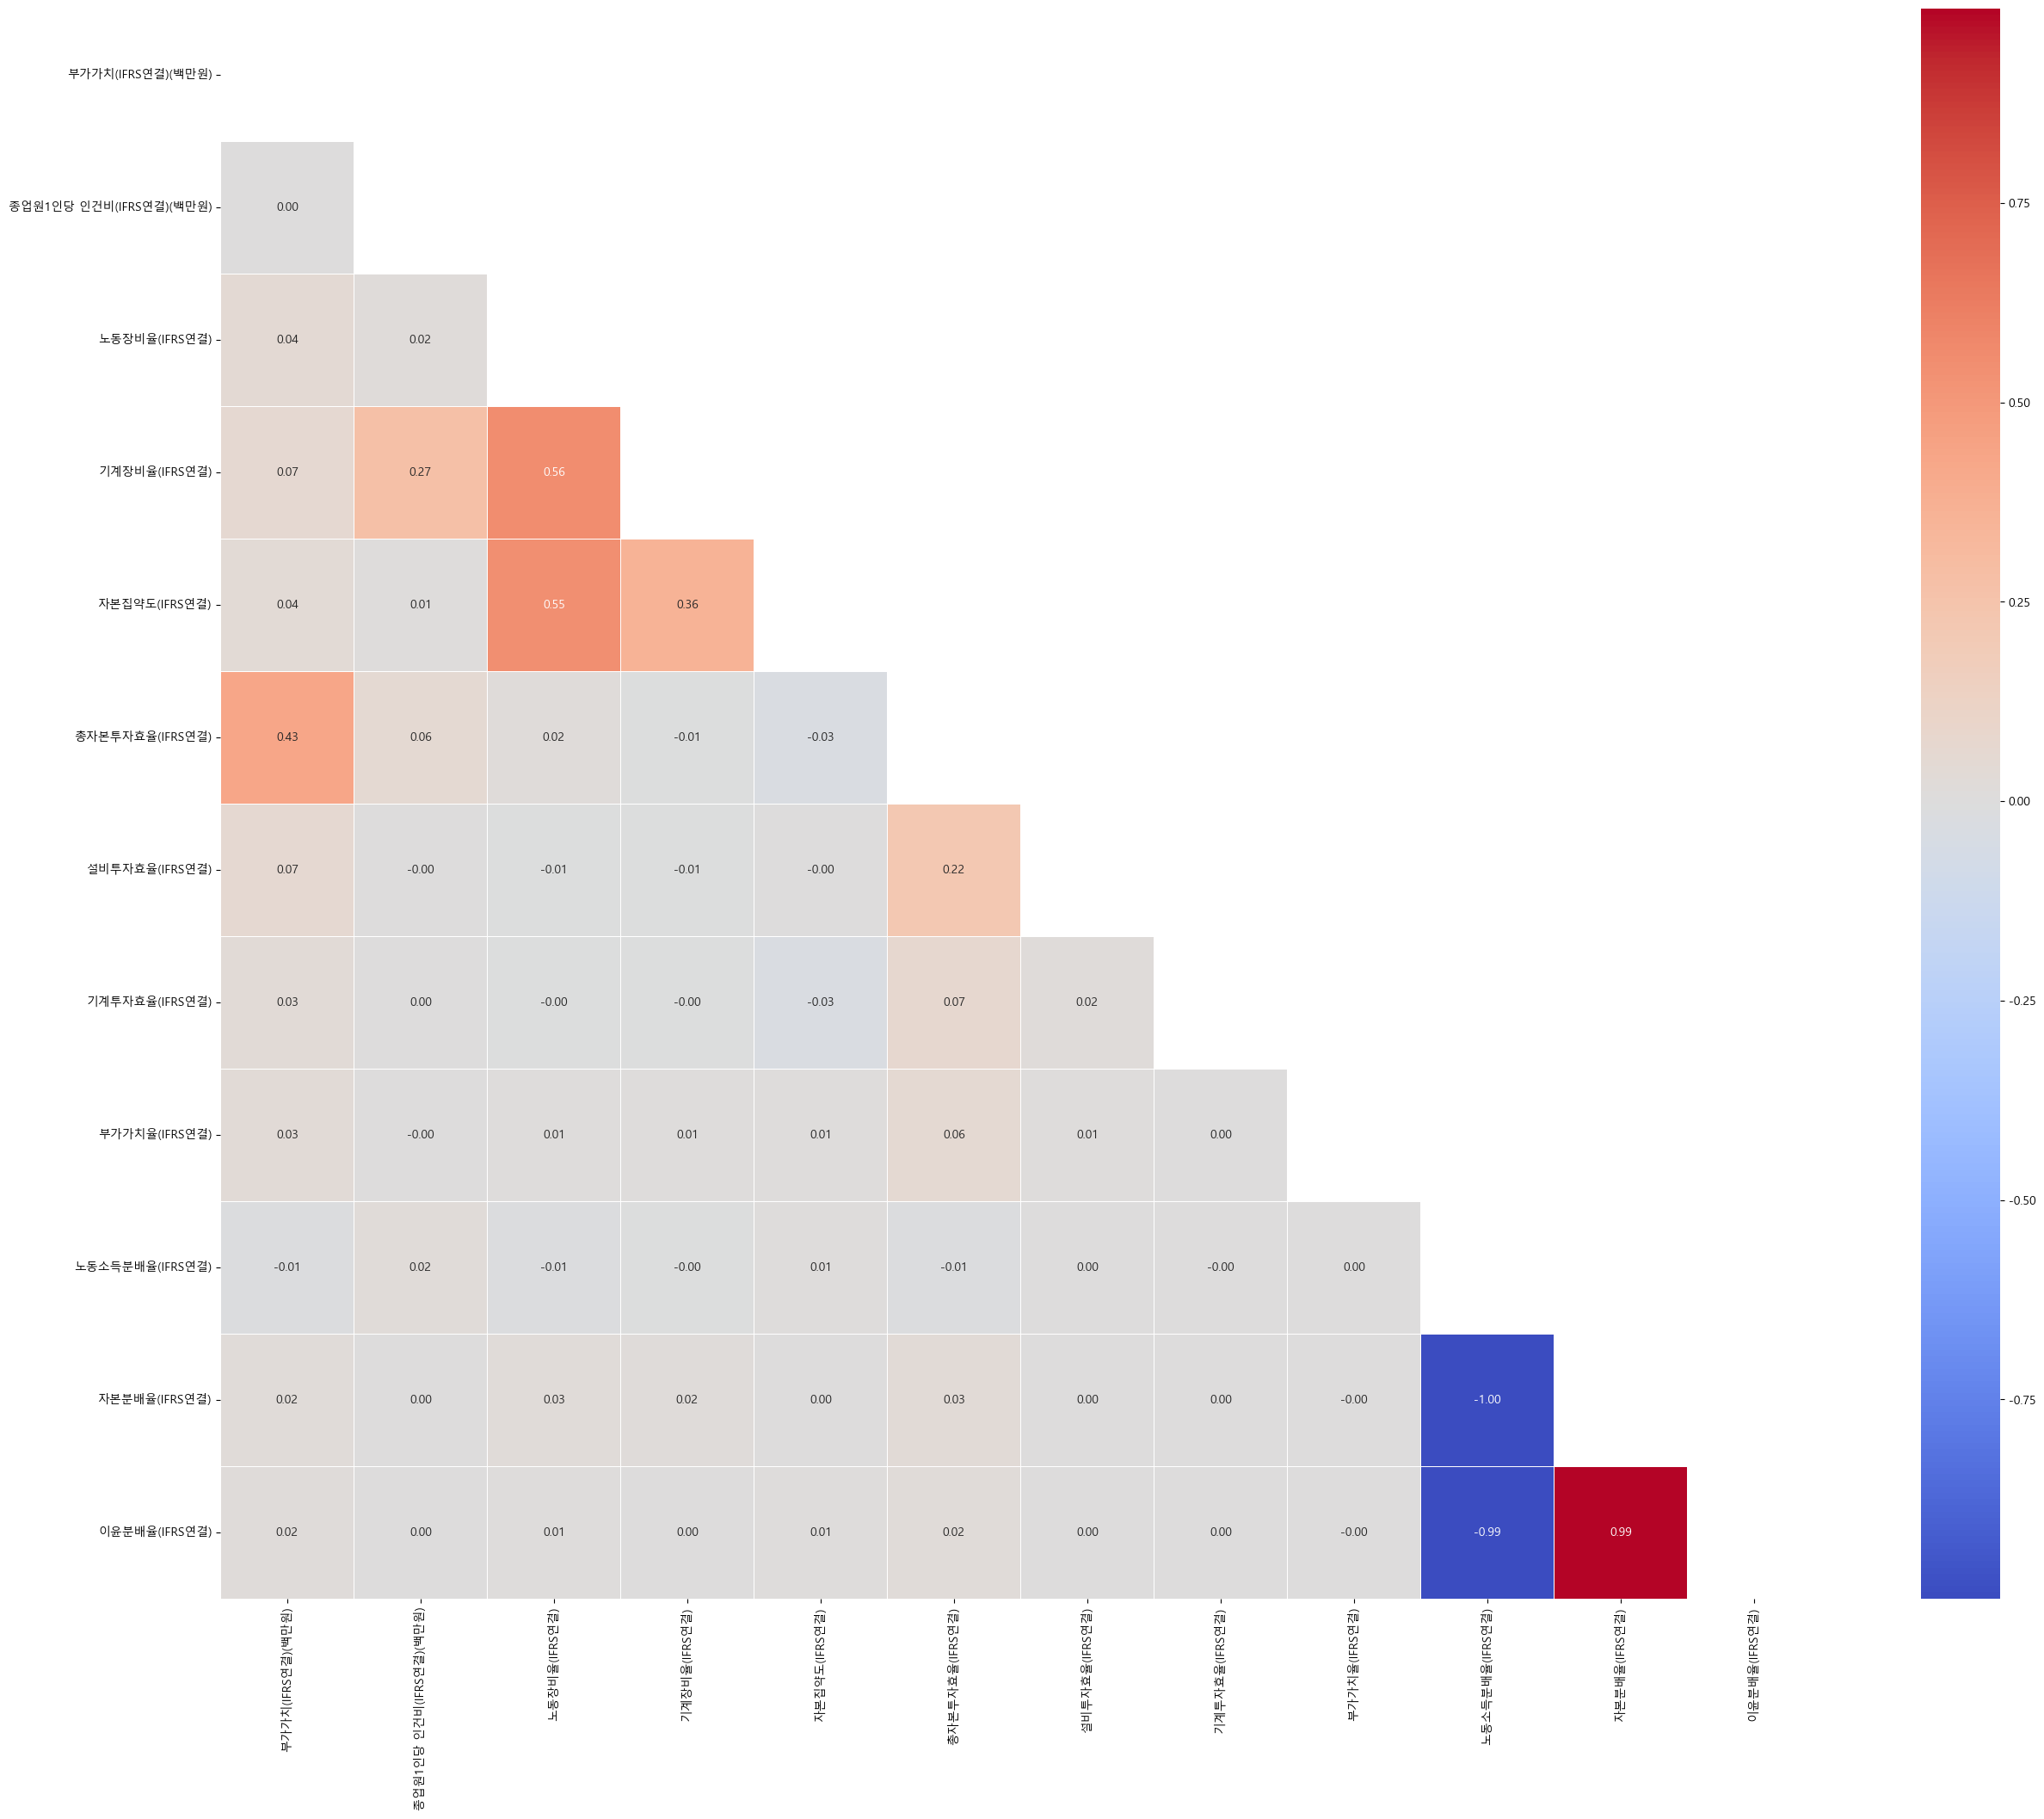

In [353]:
plt.figure(figsize=(30, 24))
mask = np.triu(np.ones_like(상장_IFRS_생산성.corr(), dtype=bool))



sns.heatmap(상장_IFRS_생산성.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f',mask=mask)

In [404]:
상장_IFRS_부가가치 = df.iloc[:,127:139] # 부가가치 제외,. 
상장_IFRS_부가가치.isnull().sum()
상장_IFRS_부가가치.eq(0).sum(axis=0)

부가가치(IFRS연결)(백만원).1               513
법인세비용차감전(계속사업)손익(IFRS연결)(백만원)     513
인건비(IFRS연결)(백만원)                  583
금융비용(IFRS연결)(백만원)                 533
임차료(IFRS연결)(백만원)                 6048
세금과공과(IFRS연결)(백만원)               7029
감가상각비(IFRS연결)(백만원)                517
종업원1인당 부가가치(IFRS연결)(백만원)          520
총자본투자효율(IFRS연결).1                 617
기계투자효율(IFRS연결).1                 1058
부가가치율(IFRS연결).1                   579
종업원수(IFRS연결)                      528
dtype: int64

In [397]:
for i in 상장_IFRS_부가가치.columns:
    statistic, pvalue = stats.shapiro(상장_IFRS_부가가치[i])
    print(f'{i}: {statistic:.4f}, {pvalue:.4f}')

부가가치(IFRS연결)(백만원).1: 0.4161, 0.0000
법인세비용차감전(계속사업)손익(IFRS연결)(백만원): 0.3202, 0.0000
인건비(IFRS연결)(백만원): 0.5698, 0.0000
금융비용(IFRS연결)(백만원): 0.5154, 0.0000
임차료(IFRS연결)(백만원): 0.3002, 0.0000
세금과공과(IFRS연결)(백만원): 0.1301, 0.0000
감가상각비(IFRS연결)(백만원): 0.5845, 0.0000
종업원1인당 부가가치(IFRS연결)(백만원): nan, 1.0000
총자본투자효율(IFRS연결).1: 0.3219, 0.0000
기계투자효율(IFRS연결).1: 0.0422, 0.0000
부가가치율(IFRS연결).1: 0.0129, 0.0000
종업원수(IFRS연결): nan, 1.0000


In [398]:
for i in 상장_IFRS_부가가치.columns:
    statistic, pvalue = stats.shapiro(상장_IFRS_부가가치[i])
    print(f'{i}: {statistic:.4f}, {pvalue:.4f}')

부가가치(IFRS연결)(백만원).1: 0.4161, 0.0000
법인세비용차감전(계속사업)손익(IFRS연결)(백만원): 0.3202, 0.0000
인건비(IFRS연결)(백만원): 0.5698, 0.0000
금융비용(IFRS연결)(백만원): 0.5154, 0.0000
임차료(IFRS연결)(백만원): 0.3002, 0.0000
세금과공과(IFRS연결)(백만원): 0.1301, 0.0000
감가상각비(IFRS연결)(백만원): 0.5845, 0.0000
종업원1인당 부가가치(IFRS연결)(백만원): nan, 1.0000
총자본투자효율(IFRS연결).1: 0.3219, 0.0000
기계투자효율(IFRS연결).1: 0.0422, 0.0000
부가가치율(IFRS연결).1: 0.0129, 0.0000
종업원수(IFRS연결): nan, 1.0000


<Axes: >

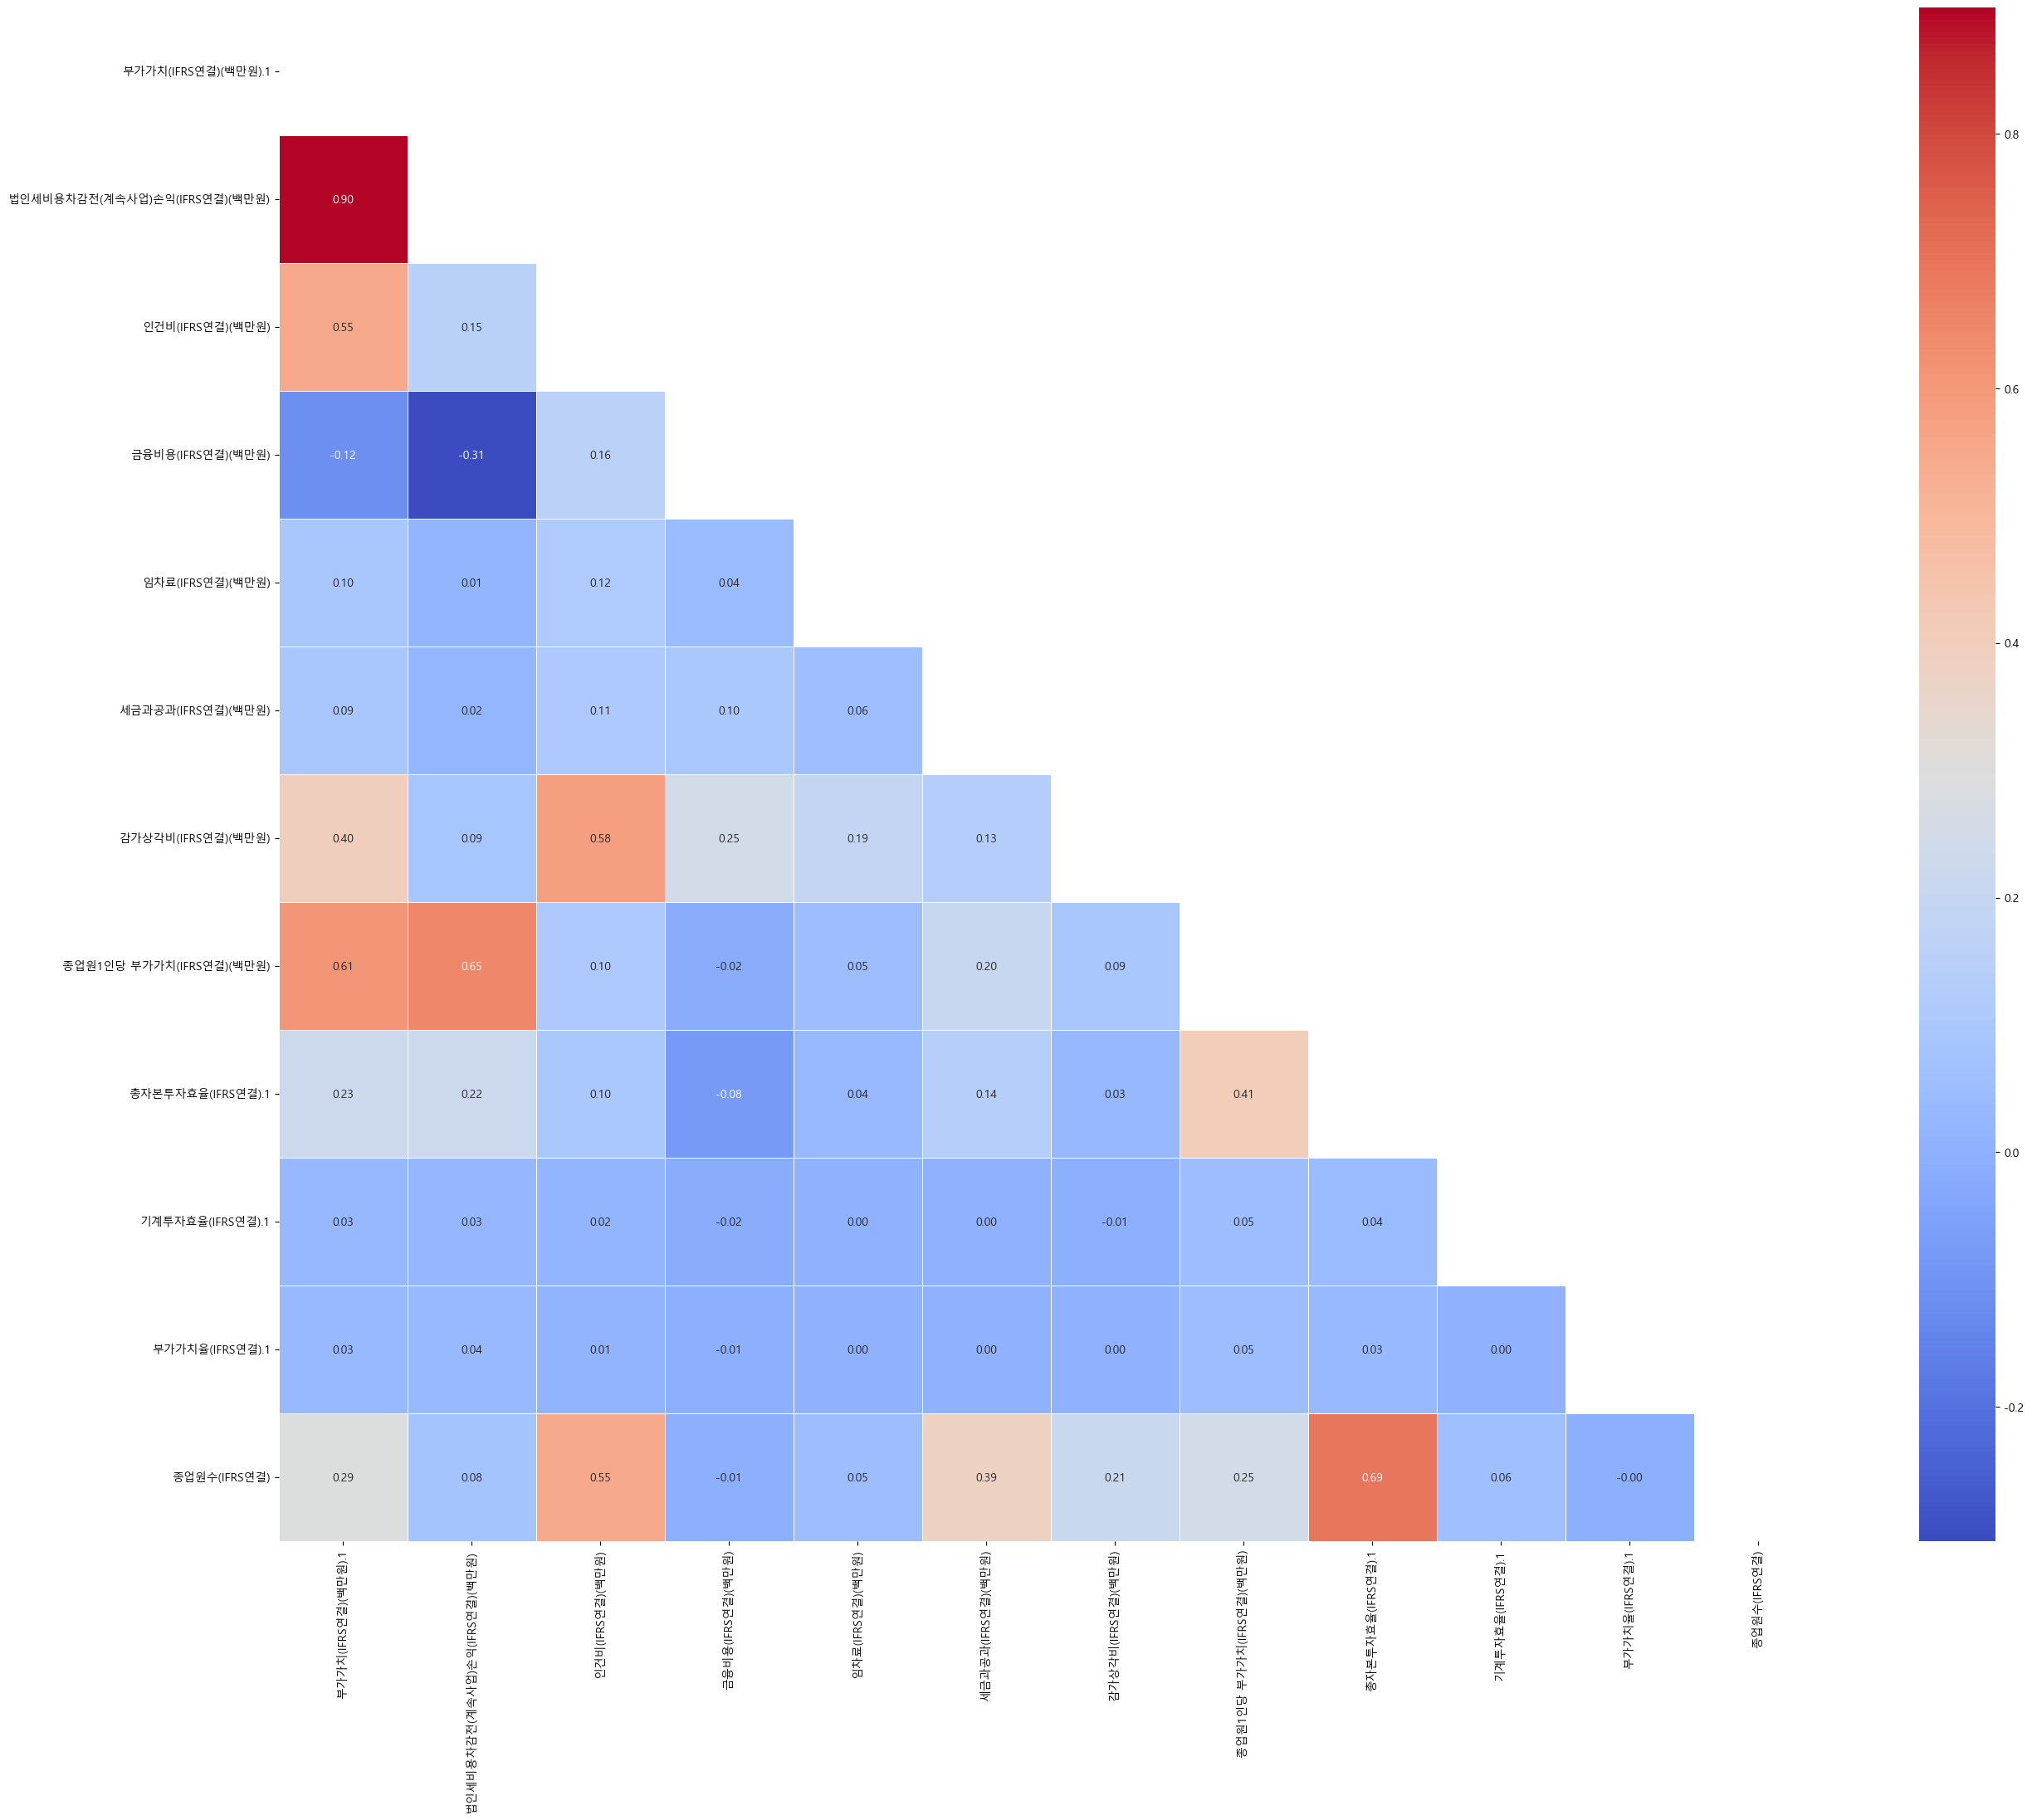

In [357]:
plt.figure(figsize=(30, 24))
mask = np.triu(np.ones_like(상장_IFRS_부가가치.corr(), dtype=bool))



sns.heatmap(상장_IFRS_부가가치.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f',mask=mask)

In [402]:
상장_IFRS_투자지표 = df.iloc[:,139:147]
상장_IFRS_투자지표.isnull().sum()
상장_IFRS_투자지표.eq(0).sum(axis=0)

PER(Price earnings ratio)(최고)      4131
PER(Price earnings ratio)(최저)      4156
PBR(Price book-value ratio)(최고)     751
PBR(Price book-value ratio)(최저)    1523
PCR(Price cash-flow ratio)(최고)     3662
PCR(Price cash-flow ratio)(최저)     3694
PSR(Price sales ratio)(최고)          847
PSR(Price sales ratio)(최저)         1851
dtype: int64

In [399]:
for i in 상장_IFRS_투자지표.columns:
    statistic, pvalue = stats.shapiro(상장_IFRS_투자지표[i])
    print(f'{i}: {statistic:.4f}, {pvalue:.4f}')

PER(Price earnings ratio)(최고): nan, 1.0000
PER(Price earnings ratio)(최저): nan, 1.0000
PBR(Price book-value ratio)(최고): nan, 1.0000
PBR(Price book-value ratio)(최저): nan, 1.0000
PCR(Price cash-flow ratio)(최고): nan, 1.0000
PCR(Price cash-flow ratio)(최저): nan, 1.0000
PSR(Price sales ratio)(최고): nan, 1.0000
PSR(Price sales ratio)(최저): nan, 1.0000


In [364]:
상장_IFRS_EBITDA = df.iloc[:,147:153]
상장_IFRS_EBITDA.isnull().sum()
상장_IFRS_EBITDA.eq(0).sum(axis=0)

기업가치(EV)(백만원)             0
EBITDA(백만원)               1
EBITDA/매출액(%)           160
EBITDA/금융비용(배)          983
EBITDA/평균발행주식수(백만원)      12
EV/EBITDA(배)           2723
dtype: int64

In [400]:
for i in 상장_IFRS_EBITDA.columns:
    statistic, pvalue = stats.shapiro(상장_IFRS_EBITDA[i])
    print(f'{i}: {statistic:.4f}, {pvalue:.4f}')

기업가치(EV)(백만원): nan, 1.0000
EBITDA(백만원): nan, 1.0000
EBITDA/매출액(%): nan, 1.0000
EBITDA/금융비용(배): nan, 1.0000
EBITDA/평균발행주식수(백만원): nan, 1.0000
EV/EBITDA(배): nan, 1.0000


<Axes: >

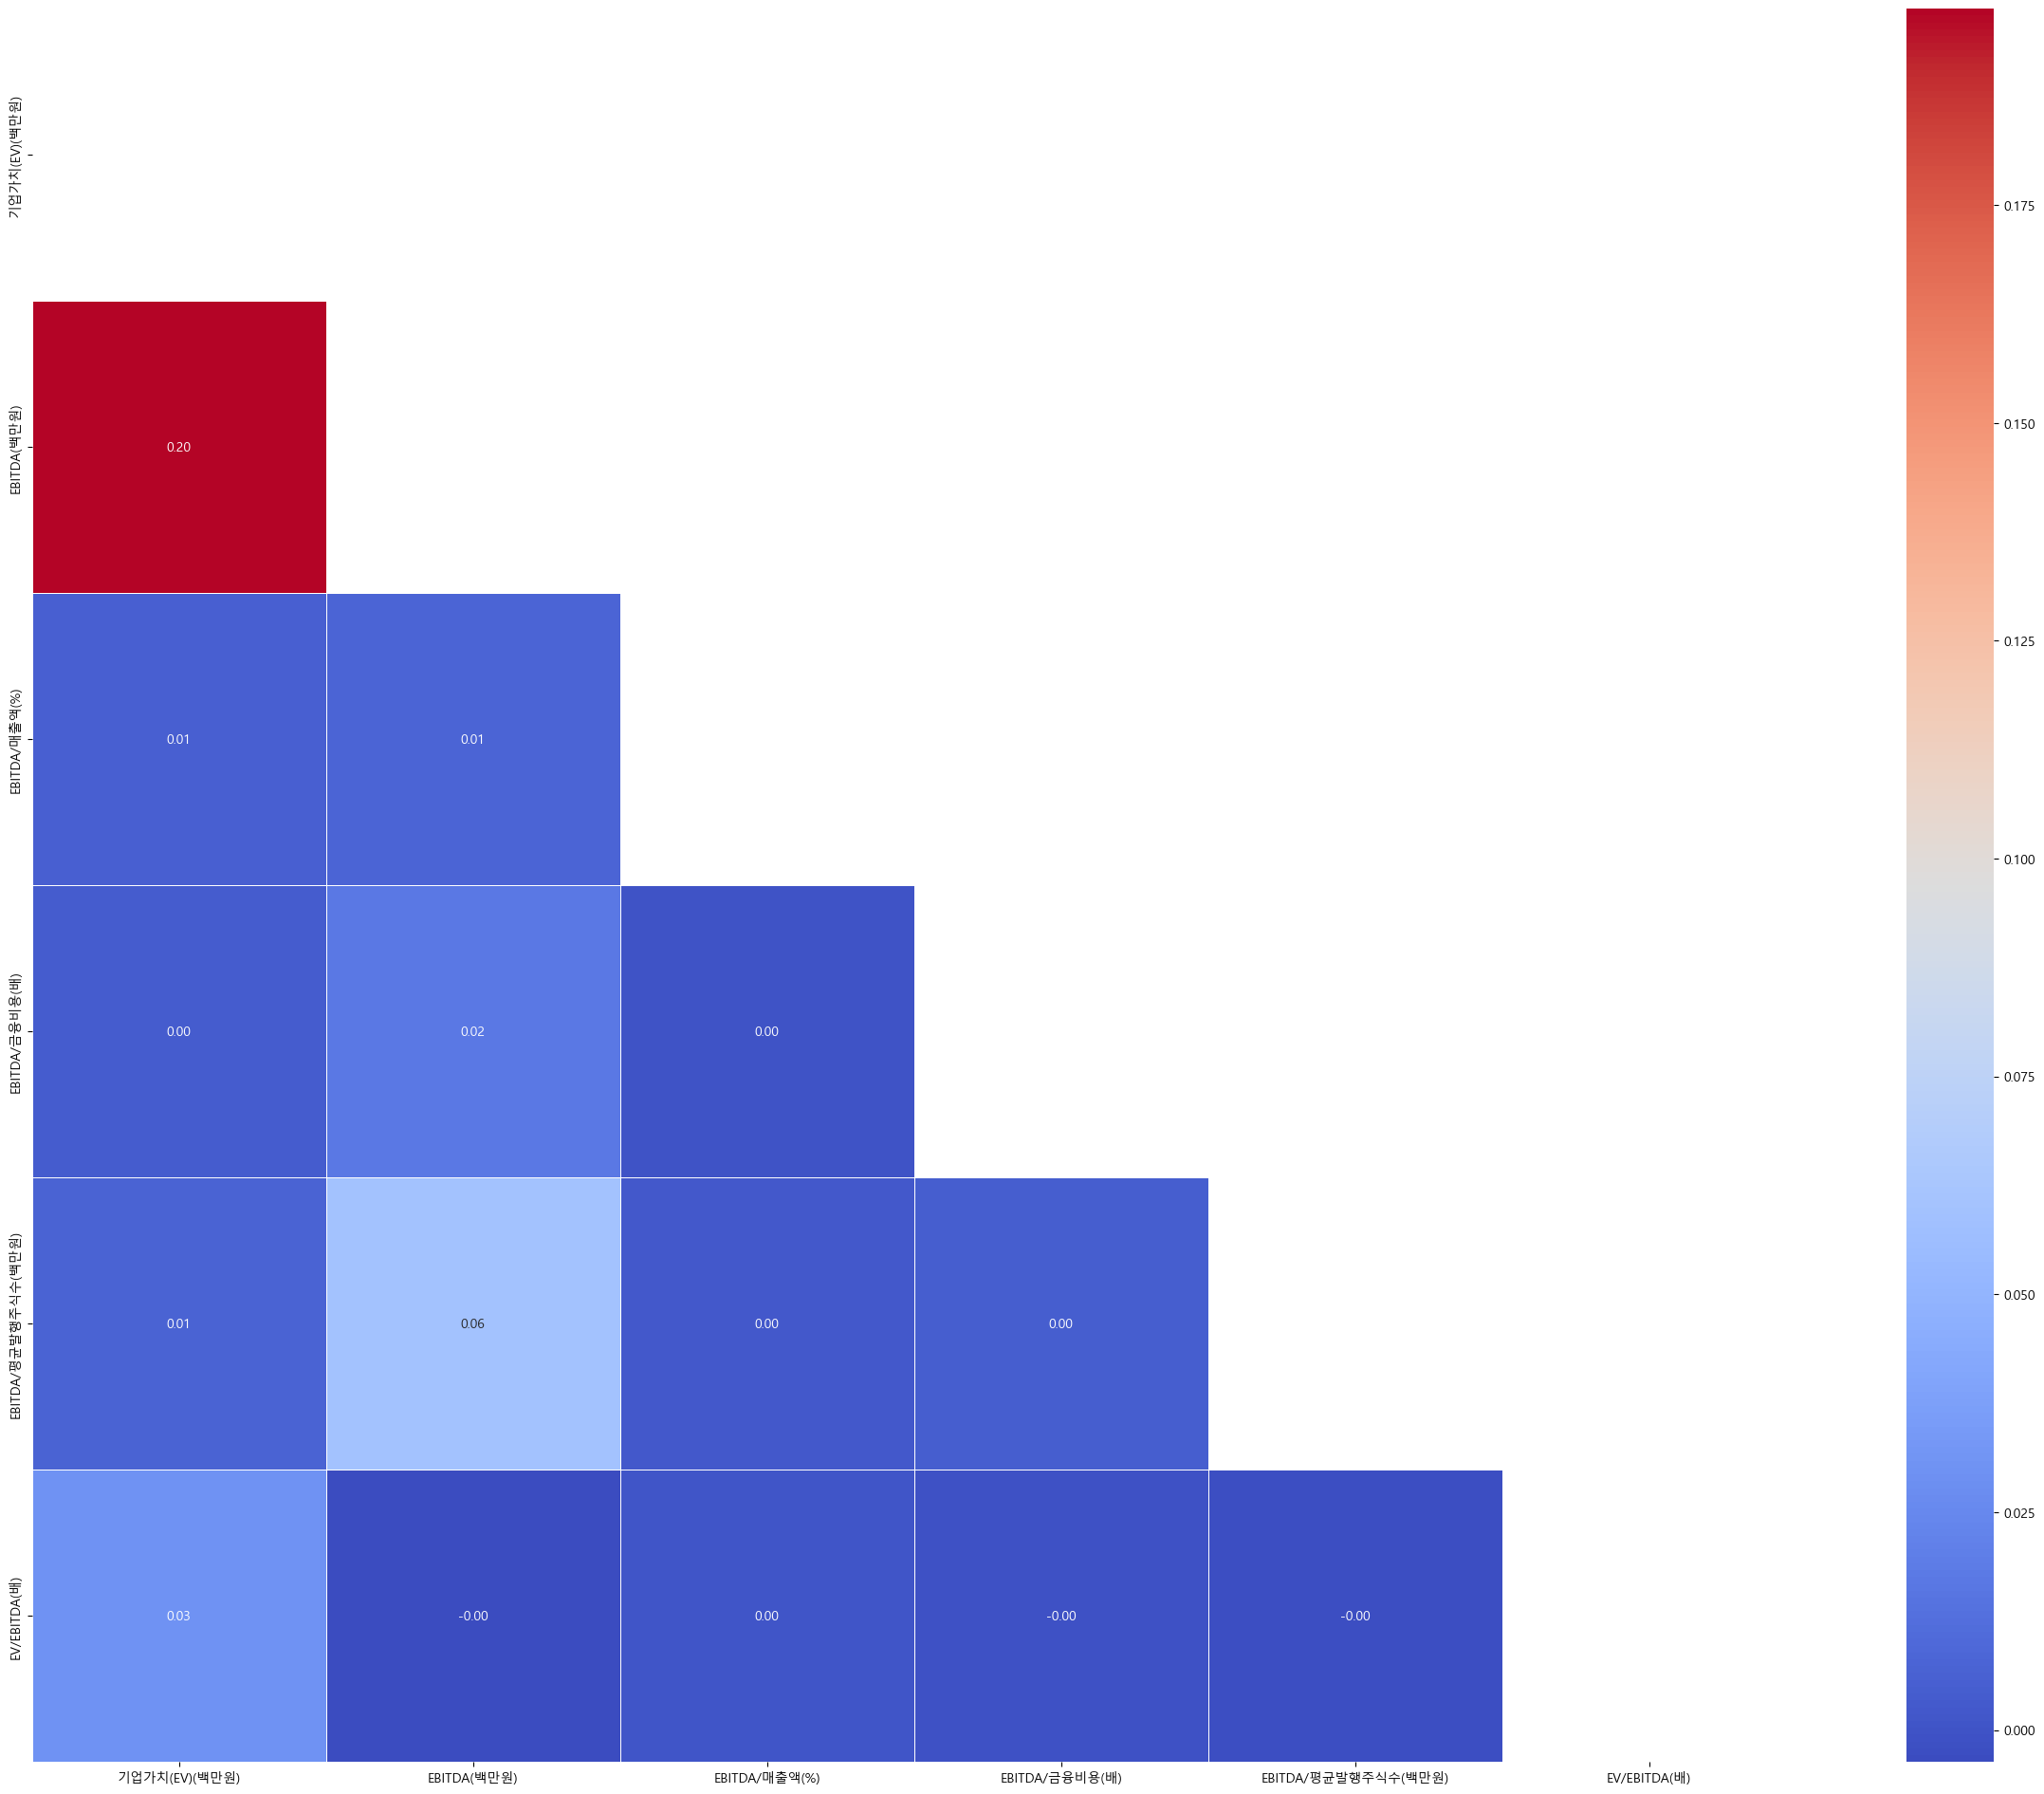

In [365]:
plt.figure(figsize=(30, 24))
mask = np.triu(np.ones_like(상장_IFRS_EBITDA.corr(), dtype=bool))



sns.heatmap(상장_IFRS_EBITDA.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f',mask=mask)